## Clustering

In [ ]:
import pandas as pd

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import pandas as pd

In [2]:
data = pd.read_csv("/Users/tanjamarkotic/Desktop/DMML2019_Team_Swatch/data/DataWithLocationCleaned.csv.gz")




In [3]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"(48.905266, -95.314404)"


In [4]:
data['position']=data['position'].str.replace(" ", "").str.strip('(').str.strip(')')
data['latitude']=data['position'].str.split(',').str[0].str.split('.').str[0]
data['longitude']=data['position'].str.split(',').str[1].str.split('.').str[0]

print(data[['latitude','longitude']])

       latitude longitude
0            48       -95
1            48       -95
2            48       -95
3            48       -95
4            48       -95
5            48       -95
6            48       -95
7            48       -95
8            48       -95
9            48       -95
10           48       -95
11           48       -95
12           48       -95
13           48       -95
14           42       -83
15           42       -83
16           42       -83
17           29      -100
18           29      -100
19           29      -100
20           48      -122
21           48      -122
22           48      -122
23           48      -122
24           48      -122
25           48      -122
26           48      -122
27           48      -122
28           48      -122
29           48      -122
...         ...       ...
349142       32      -117
349143       31      -106
349144       48      -100
349145       46       -84
349146       48      -101
349147       48      -101
349148      

In [5]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position,latitude,longitude
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,6,"48.905266,-95.314404",48,-95
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,6,"48.905266,-95.314404",48,-95
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,6,"48.905266,-95.314404",48,-95
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,6,"48.905266,-95.314404",48,-95
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,6,"48.905266,-95.314404",48,-95


In [6]:
data.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
latitude     object
longitude    object
dtype: object

In [7]:
data['latitude'].unique()

array(['48', '42', '29', '44', '45', '31', '26', '27', '28', '25', '41',
       '43', 'InternationalFalls', '47', '62', 'PleasantCamp', '55', '59',
       '32', "'48", '46', "'44", '35'], dtype=object)

In [8]:
data['latitude'] = data['latitude'].replace(['InternationalFalls'], 48)
data['latitude'] = data['latitude'].replace(['PleasantCamp'], 59)
data['latitude'] = data['latitude'].replace("\'48", '48')
data['latitude'] = data['latitude'].replace("\'44", '44')

In [9]:
data['latitude'].unique()

array(['48', '42', '29', '44', '45', '31', '26', '27', '28', '25', '41',
       '43', 48, '47', '62', 59, '55', '59', '32', '46', '35'],
      dtype=object)

In [10]:
data['longitude'].unique()

array(['-95', '-83', '-100', '-122', '-123', '-119', '-117', '-118',
       '-72', '-71', '-73', '-106', '-99', '-98', '-97', '-104', '-102',
       '-82', '-74', '-75', '-76', '-78', '-107', '-101', '-96',
       'KoochichingCounty', '-89', '-141', 'Skagway', '-131', '-135',
       '-109', '-112', '-110', '-114', '-111', '-115', '-116', "'-116",
       '-67', "'-66", '-68', '-70', '-84', '-94', '-103', '-108', '-105'],
      dtype=object)

In [11]:
data['longitude'] = data['longitude'].replace('KoochichingCounty', '-93')
data['longitude'] = data['longitude'].replace('Skagway', '-136')

# A contôler!!
data['longitude'] = data['longitude'].replace('\'-116', '-116')
data['longitude'] = data['longitude'].replace('\'-66', '-66')

In [12]:
data['longitude'].unique()

array(['-95', '-83', '-100', '-122', '-123', '-119', '-117', '-118',
       '-72', '-71', '-73', '-106', '-99', '-98', '-97', '-104', '-102',
       '-82', '-74', '-75', '-76', '-78', '-107', '-101', '-96', '-93',
       '-89', '-141', '-136', '-131', '-135', '-109', '-112', '-110',
       '-114', '-111', '-115', '-116', '-67', '-66', '-68', '-70', '-84',
       '-94', '-103', '-108', '-105'], dtype=object)

In [ ]:
# 'InternationalFalls': 48.6011, -93.4110
# 'PleasantCamp': 59.452331524 -136.358665232

In [13]:
data['latitude'].astype(int)
data['longitude'].astype(int)
data.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
Year          int64
Month         int64
position     object
latitude     object
longitude    object
dtype: object

In [14]:
np.random.seed(5)

In [18]:
X = data['latitude']
y = data['longitude']


In [22]:
from sklearn import preprocessing
X = preprocessing.scale(X)
y = preprocessing.scale(y)

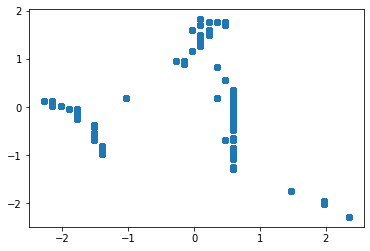

In [25]:

plt.plot(X, y, 'o')

In [26]:
estimators = [(KMeans(n_clusters=8)),
              ( KMeans(n_clusters=3))]

In [27]:
titles = ['8 clusters', '3 clusters']
for i, (name, est) in enumerate(estimators):
    plt.figure(figsize=(6, 4))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X,y)
    labels = est.labels_

    plt.scatter(X[:, 0], X[:, 1],
               c=labels.astype(np.float), edgecolor='k')

   

TypeError: cannot unpack non-iterable KMeans object